In [1]:
from Preprocessing import *
from sklearn.metrics import confusion_matrix
import seaborn as sns


Device available:  cuda


In [2]:
from Training import show_classes

In [ ]:
val_model = efficientnet_b0(weights='DEFAULT')
val_model.features[0][0].stride = (1,1)
val_model.classifier = nn.Sequential(
    nn.Dropout(p=0.3),
    nn.Linear(val_model.classifier[1].in_features, 10)
)
val_model=val_model.to(device)
val_model.load_state_dict(torch.load("efficientnetmodeltweakednograyscale.pth", map_location=device))
val_model.eval()


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [4]:
preds, labels, images = give_predictions(val_model, val_data)

cm = confusion_matrix(labels, preds)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[506   0   4   0   0   0   0   0   2   0]
 [  0 488   0   0   0   0   0   0   1   3]
 [  2   0 486   3   1   0   2   0   0   0]
 [  1   0   2 479   0  10   4   0   1   1]
 [  0   0   2   2 537   2   1   2   0   0]
 [  0   0   2   4   2 486   1   2   0   0]
 [  0   0   0   0   1   1 490   1   0   0]
 [  1   0   0   0   0   0   0 498   0   0]
 [  2   0   0   0   0   0   0   0 466   0]
 [  0   4   0   0   0   0   0   0   0 497]]


Text(0.5, 1.0, 'Confusion Matrix Heatmap')

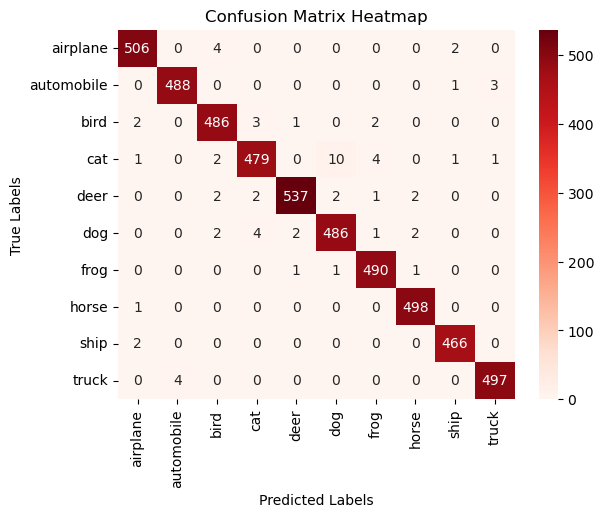

In [5]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9806904..2.09555].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9882592..2.060324].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8294913..2.09555].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9723824..1.6792808].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6168602..2.115826].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3214338..1.8699872].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9323554..1.3

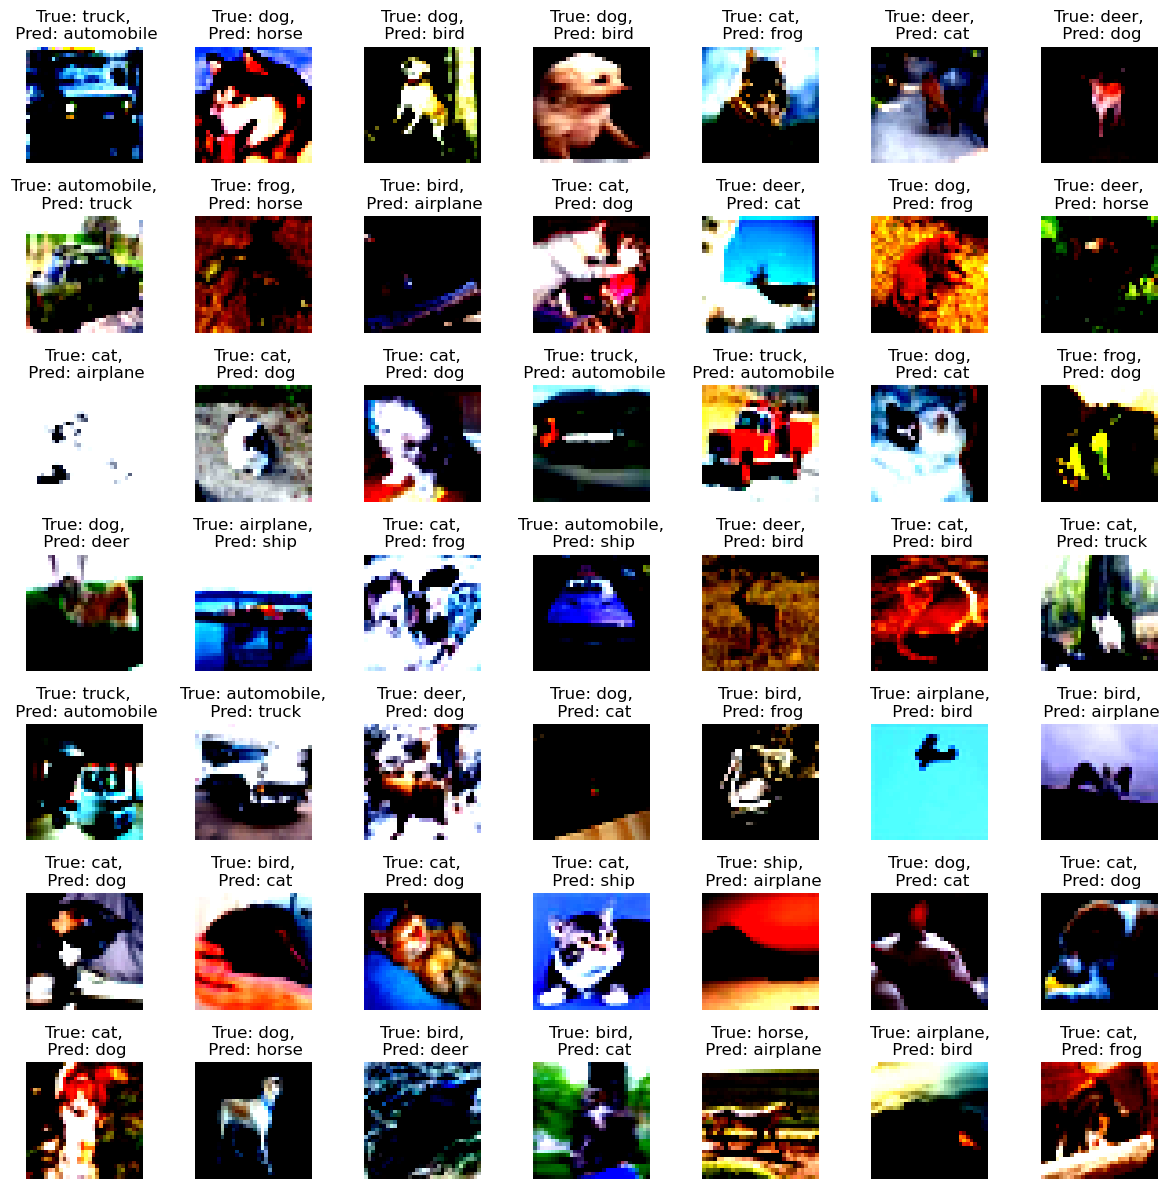

In [6]:
show_missclassification(preds,labels,images,classes=range(10),le=le)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7229044..2.1277733].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9882592..2.1277733].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9806904..2.1277733].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5778998..2.1277733].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9323554..1.5161976].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6468415..2.115826].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9088752

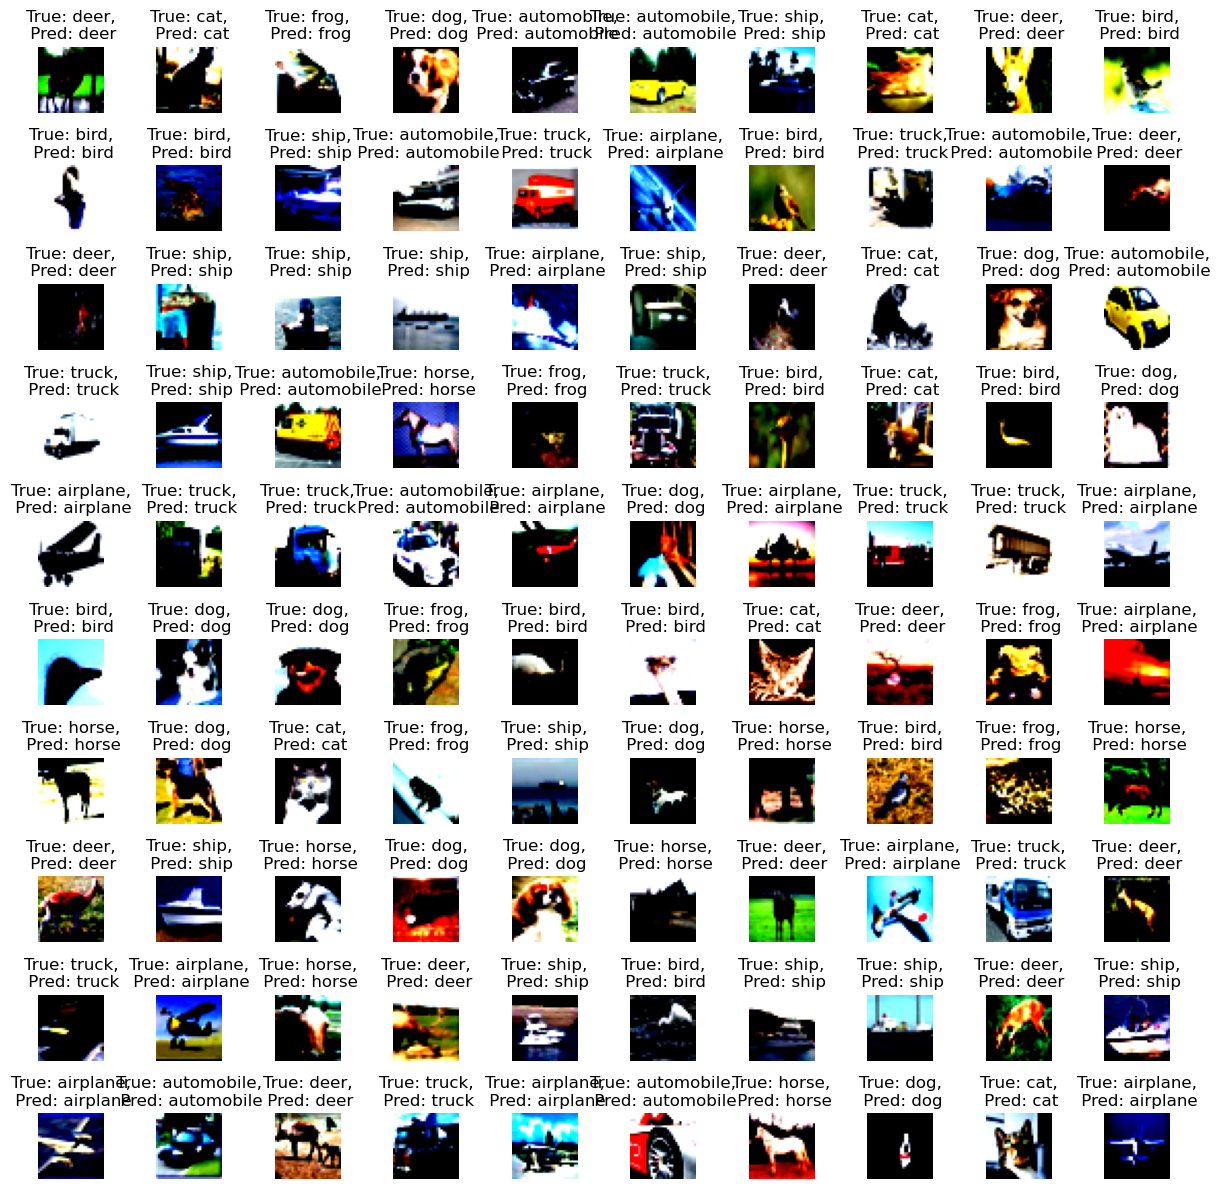

In [8]:
show_classes(preds,labels, images,range(10),le)